# Logistic Regression
In this Notebook I'll make my version of Logistic regression from the dataset provided the the deeplearning.ai course.
This data set was provided in the second week of first course in the specialization.
The objective is to make a Logistic Regression to classify cats.

In [30]:
# Importing useful packages
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [68]:
# Loading data from files into our environment
train_dataset = h5py.File('train_catvnoncat.h5','r')
train_set_x_orig = np.array(train_dataset['train_set_x'][:]) # features for training 
train_set_y_orig = np.array(train_dataset['train_set_y'][:]) # labels for training

test_dataset = h5py.File('test_catvnoncat.h5','r')
test_set_x_orig = np.array(test_dataset['test_set_x'][:]) # features for test
test_set_y_orig = np.array(test_dataset['test_set_y'][:]) # labels for test

classes = np.array(test_dataset['list_classes'][:]) # the list of classes

# Reshaping labels
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

cat


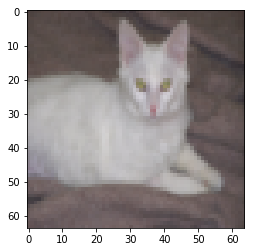

In [71]:
# Visualizing the data
index = 109
plt.imshow(train_set_x_orig[index])
if train_set_y_orig[0,index] == 1:
    print('cat')
else:
    print('non-cat')

In [75]:
m_train = train_set_x_orig.shape[0] # Number of training examples
m_test = test_set_x_orig.shape[0] # Number of test examples
print('Number of Training examples are',m_train)
print('Number of Test examples are',m_test)
print('Shape of 1 example in data',train_set_x_orig[1].shape) # This shows the image is 64 x 64 in size and is colored

Number of Training examples are 209
Number of Test examples are 50
Shape of 1 example in data (64, 64, 3)


In [74]:
# Flatting means to convert the 64 x 64 x 3 data into one single row on data so that it is easier to process on the data
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print('Shape of flatened out train set',train_set_x_flatten.shape)
print('Shape of flatened out test set',test_set_x_flatten.shape)

Shape of flatened out train set (12288, 209)
Shape of flatened out test set (12288, 50)


In [79]:
# Standardzing the data set
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255